# Support Vector Regression

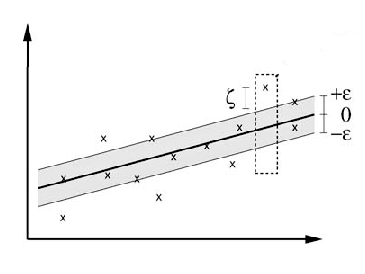

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def nonlinear(array):
    return (10*array[:,0]-np.exp(0.01*array[:,1]+np.log(1+array[:,2]**2)))/(array[:,3]**2+5)

In [3]:
n_samples = 200
n_features = 4

In [4]:
x = 5*np.random.rand(n_samples,n_features)

In [5]:
y = nonlinear(x)+np.random.randn(n_samples)


y=y.reshape(n_samples,1)

In [6]:
df = pd.DataFrame(data=np.hstack((x,y)),columns=['X1','X2','X3','X4','y'])

In [7]:
df.head()

X1        X2        X3        X4         y
0  1.315826  1.580325  0.320894  3.632795  0.884007
1  0.206438  0.655825  4.550996  3.110930 -1.483461
2  2.900351  3.178855  4.548473  3.734661  0.076529
3  0.765206  1.182729  1.760682  3.710570  0.282342
4  4.979246  1.565368  3.496224  4.074949  1.508500

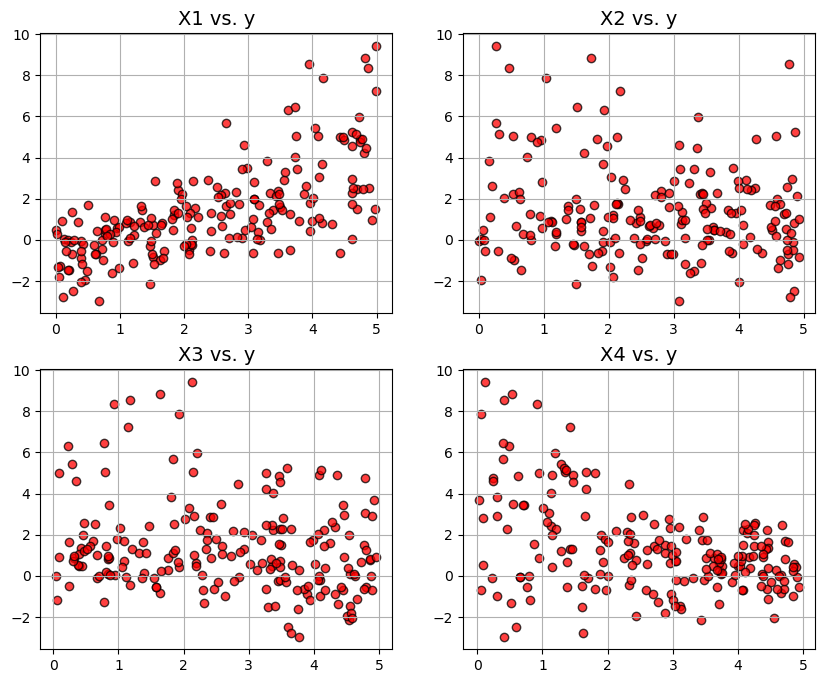

In [8]:
fig,ax = plt.subplots(2,2,figsize=(10,8))
ax = ax.ravel()
for i in range(4):
    ax[i].scatter(df[df.columns[i]],df['y'],edgecolor='k',color='red',alpha=0.75)
    ax[i].set_title(f"{df.columns[i]} vs. y",fontsize=14)
    ax[i].grid(True)
plt.show()

Test/Train Split

In [9]:
X = df[['X1','X2','X3','X4']]
y = df['y']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [12]:
lr.score(X_test,y_test)

0.6296178656559577

__SVR with Linear kernel__

In [13]:
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
svr_linear.fit(X_train, y_train) 

SVR(kernel='linear')

In [14]:
svr_linear.score(X_test,y_test)

0.6319133771922366

__SVR with RBF kernel__

In [15]:
svr_rbf = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_rbf.fit(X_train, y_train) 

SVR()

In [16]:
svr_rbf.score(X_test,y_test)

0.7130613776435686

Hyperparameters for SVR

1. Regularization parameter (C) -  The amount of misclassification we want to avoid.
    – Hard margin SVM generally has large values of C.
    – Soft margin SVM generally has small values of C.

2. Epsilon - It specifies the epsilon-tube within which no penalty is associated. Must be non-negative.

3. Kernel type

In [17]:
from sklearn.model_selection import GridSearchCV

params = {'C':[0.01,0.05,0.1,0.5,1,2,5],'epsilon':[0.1,0.2,0.5,1]}

grid = GridSearchCV(svr_rbf,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5],
                         'epsilon': [0.1, 0.2, 0.5, 1]},
             return_train_score=True, scoring='r2', verbose=1)

In [18]:
grid.best_estimator_


SVR(C=5, epsilon=0.5)

In [19]:
svr_best=SVR(kernel='rbf',gamma='scale', C=5.0, epsilon=0.5)
svr_best.fit(X_train, y_train)

SVR(C=5.0, epsilon=0.5)

In [20]:
svr_best.score(X_test,y_test)

0.7983256108803282

# Basics on Neural Networks

In [21]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import math
import matplotlib.pyplot as plt

__Loading the dataset__

In [22]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

A glimpse of the data

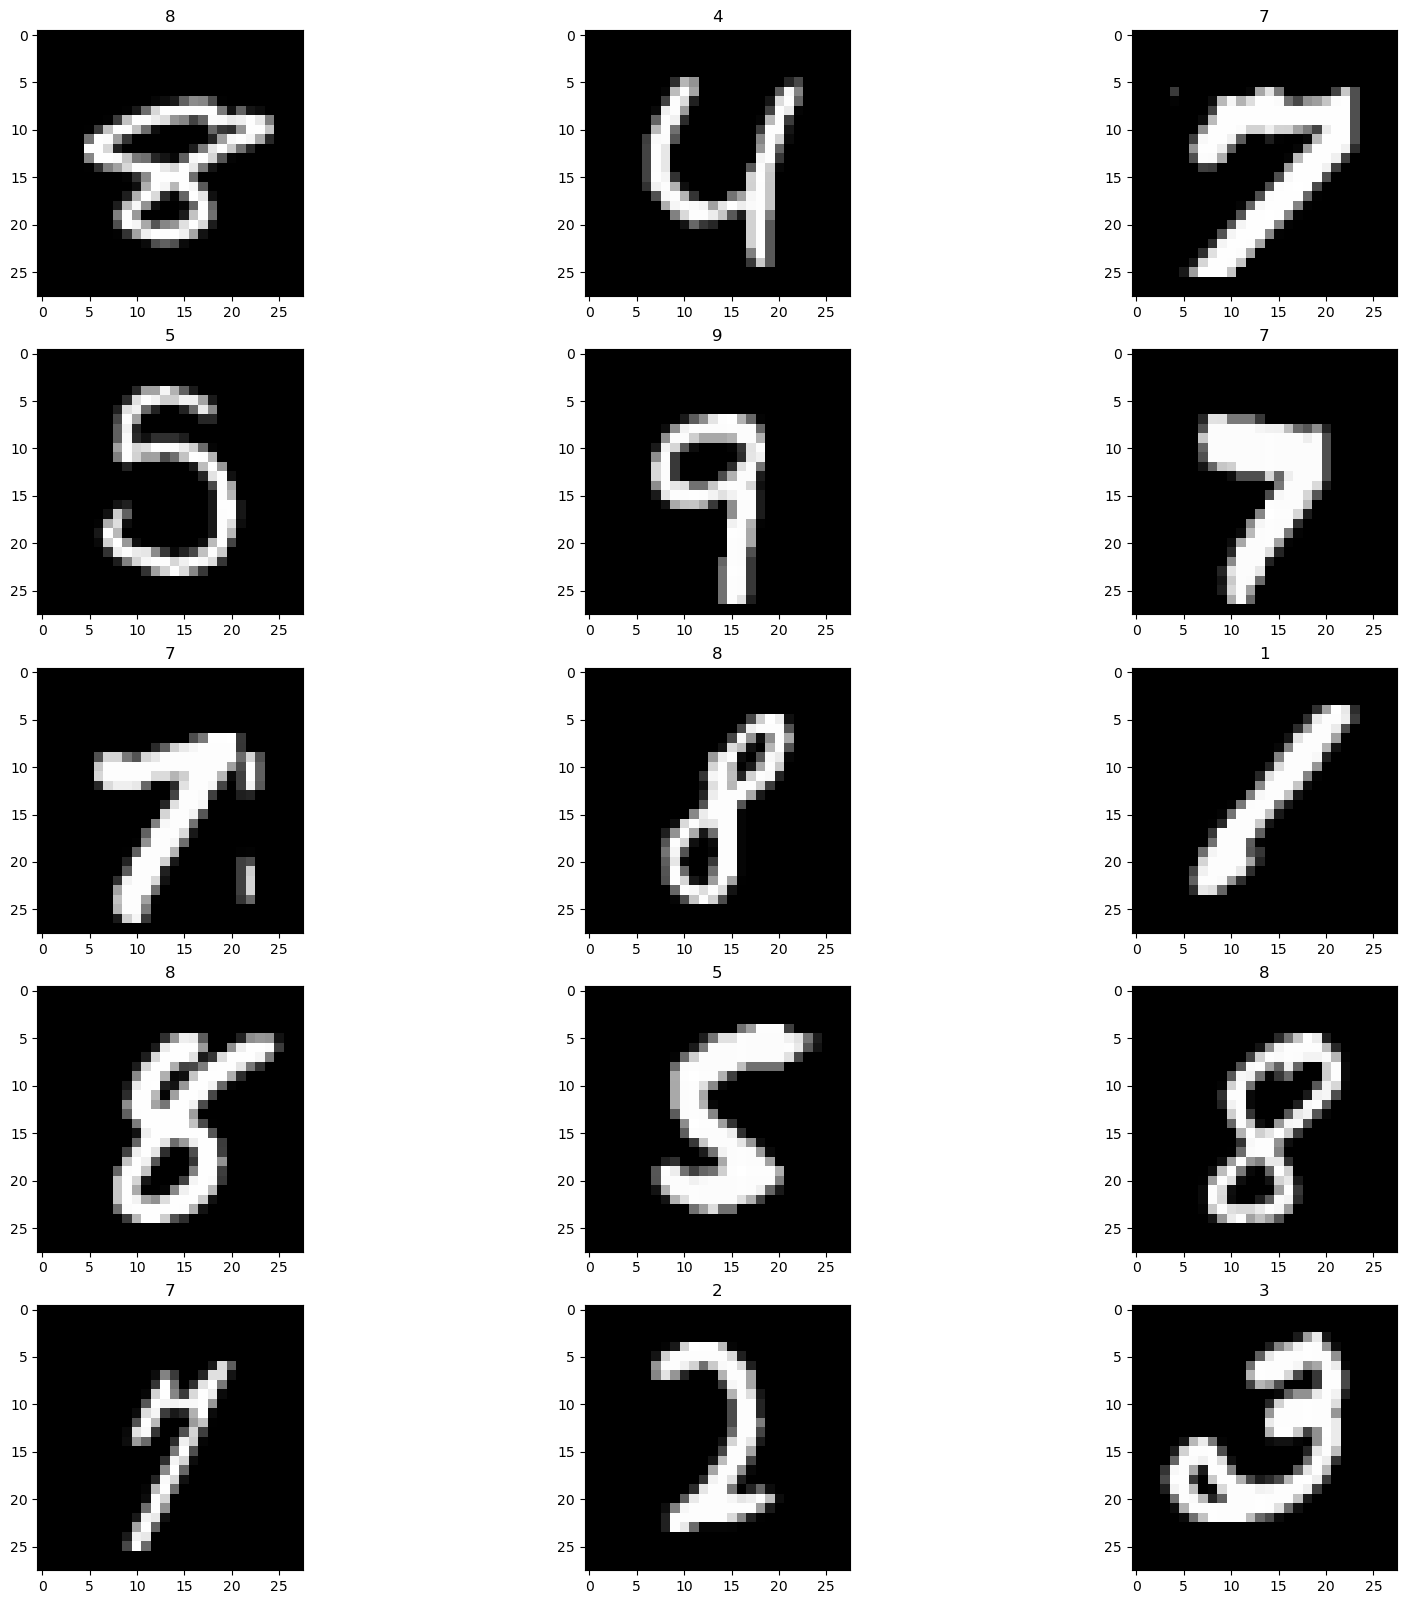

In [23]:
batch_size = 15
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True, drop_last=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
image, label = next(train_loader.__iter__())

fig, axes = plt.subplots(5, 3, figsize=(20,20))

for img, lab, ax in zip(image, label, axes.flatten()):
    ax.imshow(img.squeeze(0),cmap='gray')
    ax.set_title(int(lab))
    

__Splitting the data into batches__

In [24]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

__Neural Network Model__

In [27]:
class FeedforwardNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNNModel, self).__init__()
        # Input Layer
        self.fc1 = nn.Linear(input_dim, hidden_dim) 

        # Hidden Layer
        self.sigmoid = nn.Sigmoid()

        # Output Layer
        self.fc2 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        # Input  # LINEAR
        out = self.fc1(x)

        # Hidden  # NON-LINEAR
        out = self.sigmoid(out)

        # Output/ (readout)  # LINEAR
        out = self.fc2(out)
        return out

__Instantiating our model__

NOTE: -> Input dimension: size of the image
            28 x 28 = 784
            
      -> Output dimension: 10
          (0,1,2,3,4,5,6,7,8,9) digits
          
      -> Hidden layer dimension: 100
          - Can be any number (the number of neurons)
          - larger number means a bigger model with more parameters
          - however, this requires more training samples to learn and converge to a good model
      

In [28]:
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNNModel(input_dim, hidden_dim, output_dim)

The Loss function

In [29]:
criterion = nn.CrossEntropyLoss()

Optimization algorithm

List of optimizers available  

    - AdaDelta Class
    - AdaGrad Class
    - Adam Class
    - AdamW Class
    - SparseAdam Class
    - Adamax Class
    - LBFGS class
    - RMSprop class
    - Rprop class
    - SGD Class
    - ASGD class

In [30]:
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

Model parameters

In [31]:
model.parameters()

print(len(list(model.parameters())))

# FC Layer 1 Parameters 
print(list(model.parameters())[0].size())

# FC Layer 1 Bias Parameters
print(list(model.parameters())[1].size())

# FC Layer 2 Parameters
print(list(model.parameters())[2].size())

# FC Layer 2 Bias Parameters
print(list(model.parameters())[3].size())

4
torch.Size([100, 784])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [32]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: 
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_()
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

            

Iteration: 500. Loss: 0.638353168964386. Accuracy: 85.81999969482422
Iteration: 1000. Loss: 0.3823893070220947. Accuracy: 89.36000061035156
Iteration: 1500. Loss: 0.3208129405975342. Accuracy: 90.5199966430664
Iteration: 2000. Loss: 0.46770596504211426. Accuracy: 91.0999984741211
Iteration: 2500. Loss: 0.2821168601512909. Accuracy: 91.56999969482422
Iteration: 3000. Loss: 0.3402279317378998. Accuracy: 92.05999755859375


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity
        self.relu = nn.ReLU()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function
        out = self.fc1(x)
        # Non-linearity
        out = self.relu(out)
        # Linear function (readout)
        out = self.fc2(out)
        return out
    
'''  
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

#########################
#  USING GPU FOR MODEL #
#########################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        #########################
        #  USING GPU FOR DATA  #
        #########################
        images = images.view(-1, 28*28).requires_grad_().to(device)
        labels = labels.to(device)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:

                images = images.view(-1, 28*28).requires_grad_().to(device)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

__Adding dropout layers__

Dropout - randomly drops out some fraction of a layer's input units every step of training, making it much harder for the network to learn any spurious/minute patterns in the training data. This can help correct overfitting 

Example: torch.nn.Dropout(p=0.5)



__Batch normalization__

A batch normalization layer first normalizes the batch with its own mean and standard deviation, and then also puts the data on a new scale. Batchnorm, in effect, performs a kind of coordinated rescaling of its inputs.



_While using Batchn norm and dropout layers, we do not these layers while evaluating the model._ 
model.eval() - will help with 'switching off' these layers. 

model.train() - will set the model back in the 'training mode'